In [ ]:
import pandas as pd

Our training data has the following structure:

In [ ]:
train = pd.read_csv('../data/sfcrime-hackathon/hackathon_train.csv')
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2011-12-04 18:15:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Sunday,PARK,NONE,100 Block of BEULAH ST,-122.452331,37.767356
1,2009-01-11 19:57:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,MISSION,"ARREST, BOOKED",18TH ST / CAPP ST,-122.418272,37.761903
2,2007-01-25 18:15:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,CENTRAL,NONE,1200 Block of STOCKTON ST,-122.408521,37.797492
3,2012-01-10 08:55:00,ROBBERY,"ROBBERY, BODILY FORCE",Tuesday,NORTHERN,NONE,HAYES ST / FRANKLIN ST,-122.421333,37.777090
4,2014-05-27 12:25:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,TENDERLOIN,NONE,JONES ST / TURK ST,-122.412414,37.783004


### Category

/Users/chakravartha/Desktop/vmw hackathon/hackathon-materials/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


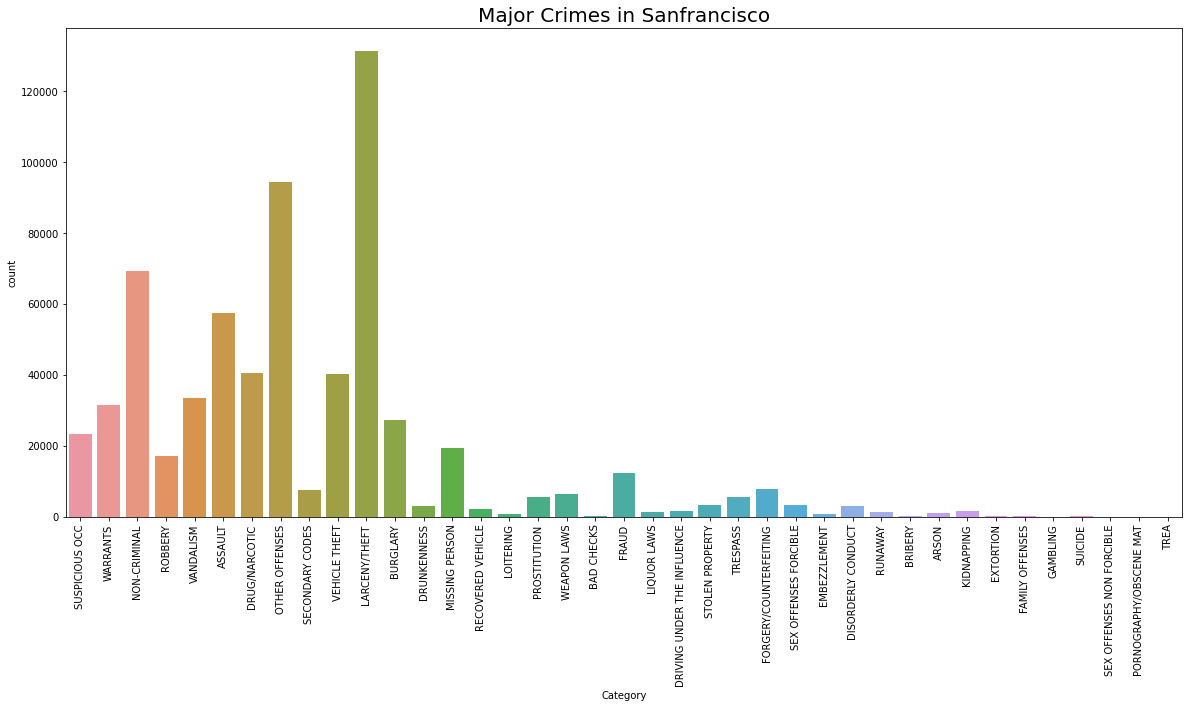

In [ ]:
plt.rcParams['figure.figsize'] = (20, 9)

sns.countplot(train['Category'])

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.savefig('../saved-plots/count-cat.jpg')
plt.show()

### Address

In [ ]:
top_addr = list(train['Address'].value_counts(ascending=False)[:20].index)

/Users/chakravartha/Desktop/vmw hackathon/hackathon-materials/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


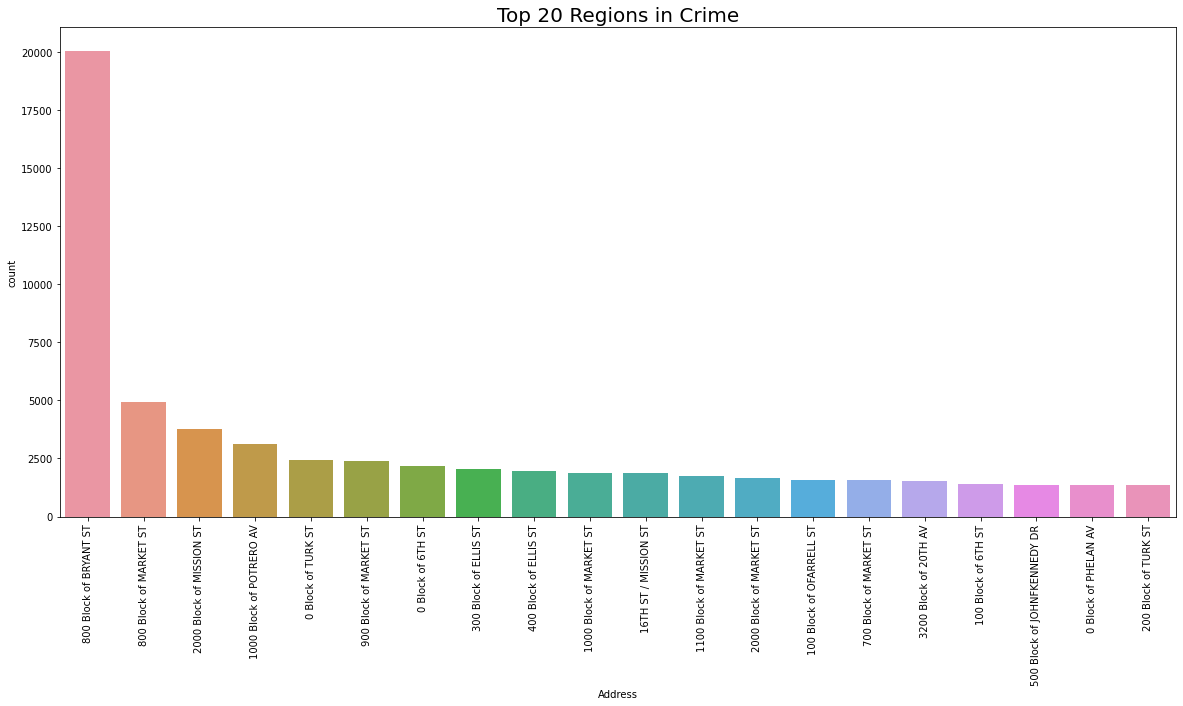

In [ ]:
sns.countplot(train[train['Address'].isin(top_addr)]['Address'],order=top_addr)
plt.title('Top 20 Regions in Crime',fontsize = 20)

plt.xticks(rotation = 90)
plt.savefig('../saved-plots/count-addr.jpg')
plt.show()

### Day

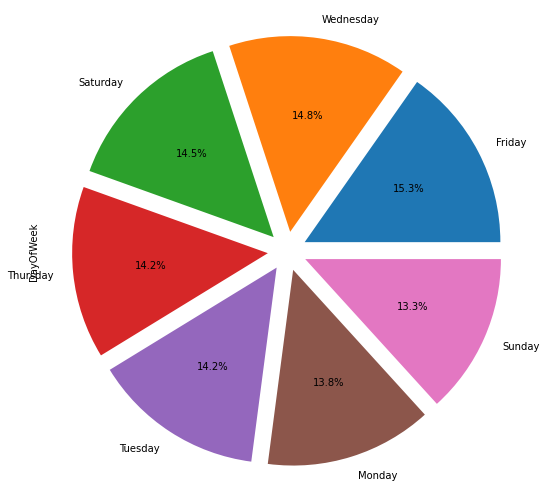

In [ ]:
train['DayOfWeek'].value_counts().plot.pie(autopct="%.1f%%", explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.savefig('../saved-plots/count-day.jpg')

### Resolutions

/Users/chakravartha/Desktop/vmw hackathon/hackathon-materials/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


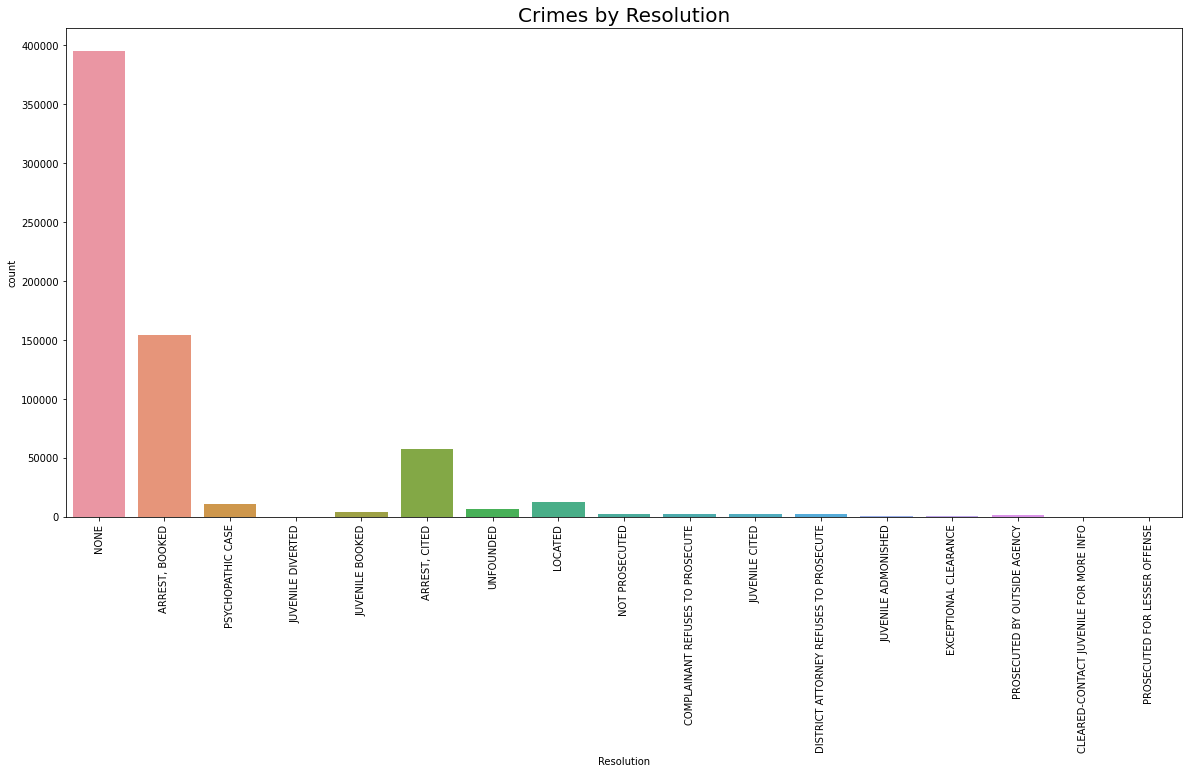

In [ ]:
sns.countplot(train['Resolution'])

plt.title('Crimes by Resolution', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.savefig('../saved-plots/count-resolution.jpg')
plt.show()

### Month

/Users/chakravartha/Desktop/vmw hackathon/hackathon-materials/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


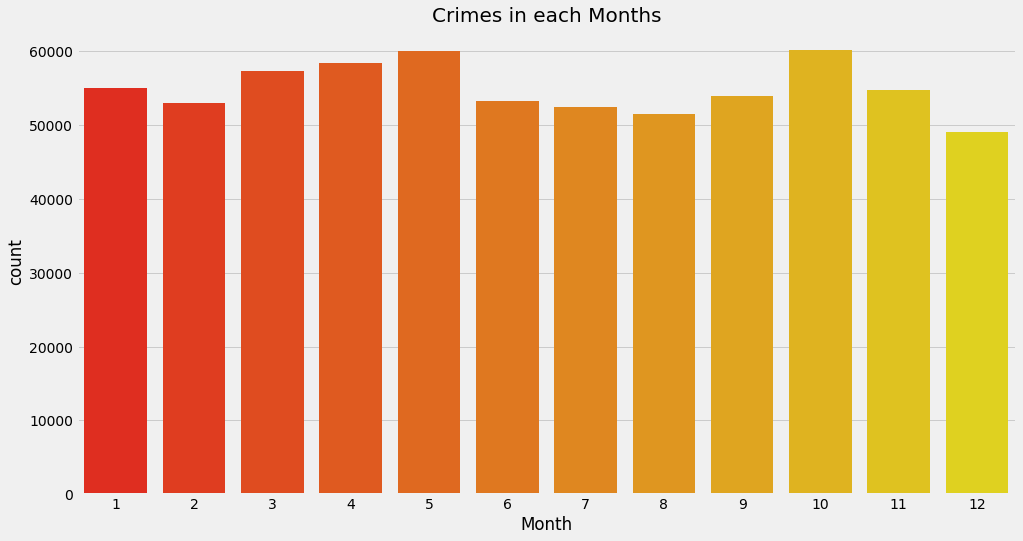

In [ ]:
train['Dates'] = pd.to_datetime(train['Dates'])
train['Month'] = train['Dates'].dt.month

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(train['Month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)
plt.savefig('../saved-plots/count-month.jpg')
plt.show()

### Time

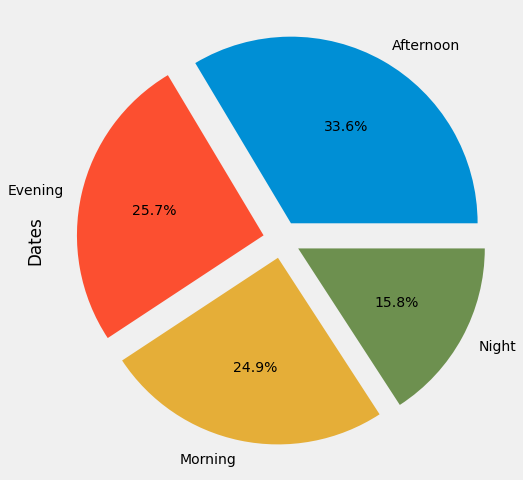

In [ ]:
train['Dates'].dt.hour
train['Hour'] = train['Dates'].dt.hour
session=pd.cut(train['Dates'].dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)

session.value_counts().plot.pie(autopct="%.1f%%", explode = (0.1, 0.1, 0.1, 0.1))
plt.savefig('../saved-plots/count-time.jpg')

## WordCloud

In [ ]:
from wordcloud import WordCloud

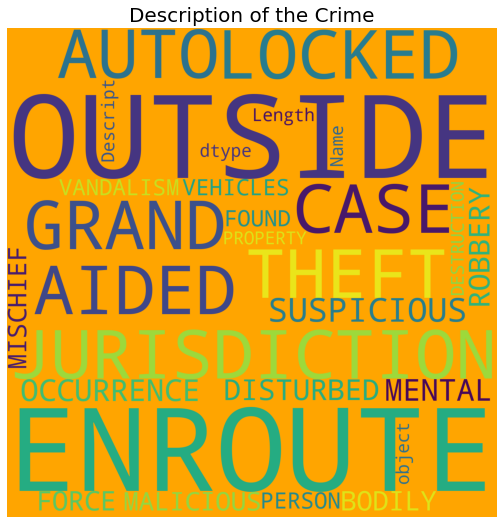

In [ ]:
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(train['Descript']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.savefig('../saved-plots/wordcloud-descript.jpg')
plt.show()

## GeoSpatial Analysis

In [ ]:
import folium
import json

In [ ]:
with open('../data/san-francisco.geojson', encoding='utf8') as f:
    map_data = json.load(f)

In [ ]:
[key for key in map_data['features'][0]]

['type', 'properties', 'geometry']

In [ ]:
[key for key in map_data['features'][0]['geometry']]

['type', 'coordinates']

In [ ]:
[key for key in map_data['features'][0]['properties']]

['OBJECTID', 'DISTRICT', 'COMPANY']

In [ ]:
t = train.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
# table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
table

,Neighborhood,Count
0,SOUTHERN,118141
1,MISSION,89792
2,NORTHERN,78701
3,BAYVIEW,67063
4,CENTRAL,64206
5,TENDERLOIN,61365
6,INGLESIDE,59174
7,TARAVAL,49204
8,PARK,36859
9,RICHMOND,34031


In [ ]:
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12, tiles='CartoDB dark_matter')
sf_map.choropleth(
    geo_data=map_data,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

/Users/chakravartha/Desktop/vmw hackathon/hackathon-materials/venv/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


Our test set is has the following structure:

In [ ]:
test = pd.read_csv('../data/sfcrime-hackathon/hackathon_test.csv', index_col='Id')
test.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-03-02 14:05:00,Monday,MISSION,200 Block of CHURCH ST,-122.428814,37.766808
1,2004-01-23 20:00:00,Friday,BAYVIEW,0 Block of CONKLING ST,-122.401829,37.735606
2,2014-01-12 00:01:00,Sunday,TENDERLOIN,300 Block of OFARRELL ST,-122.410509,37.786043
3,2005-08-28 00:05:00,Sunday,SOUTHERN,100 Block of 3RD ST,-122.400916,37.785457
4,2007-11-03 10:00:00,Saturday,CENTRAL,500 Block of UNION ST,-122.408600,37.800460


The goal is to predict the probability that a given report has a particular category. In order to do this, each team will submit a test results csv with an `Id` column and one column for each category of crime in the training set. The values in these columns will be predictions of the probability that a report falls into the given category.

In [ ]:
predictions = pd.DataFrame(
    0,
    index=test.index,
    columns=['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS']
)
predictions.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scoring

The results you generate will be scored using `neg_log_loss` scoring against the known category of the test set:

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
test_results = pd.read_csv('../data/sfcrime-hackathon/hackathon_test_result.csv', index_col='Id')
test_results.head()

,Category
Id,
0,NON-CRIMINAL
1,LARCENY/THEFT
2,LARCENY/THEFT
3,NON-CRIMINAL
4,ASSAULT


In [ ]:
# Predicting that none of the categories are ever selected; you should be able to beat this...
log_loss(test_results, predictions, labels=predictions.columns)

3.6635616461296463